In [1]:
%run functions.ipynb

In [2]:
#             !!!!!!!!
# polynomial approximation is universal, it is possible for all functions that are CONTINUOUS on a given segment
#             !!!!!!!!
# approximation by the sum of a hyperbolic cosine and a polynomial is suitable only for a narrow class of functions (that are continuous)
#  and not for every segment
# Examples of functions and segments that can be approximated in this way:
#      function   ln(x)  on segment  1 3  with  2  parameters
#      function  exp(x)  on segment  1 3  with  3  parameters
#      function  0.2exp(x)+4x+1  on segment  1 1.2  with  4  parameters
#      function  0.5tg(x)+4x^2 + 0.5  on segment  0.79 1.05  with  5  parameters

In [3]:
eps = 0.003
pi = math.pi

expression_type = int(input('Choose the type of approximation:\n\tenter  0  to select polynomial approximation \n\tenter  1  to select the approximation by the sum of the hyperbolic cosine and the polynomial\n'))
if expression_type == 0: v,A = '',0
for_text = ['exp(x)','sin(x)','cos(x)','tg(x)','ctg(x)','ln(x)','0.2exp(x) + 4x + 1','1/(1+x^3)','0.5tg(x) + 4x^2 + 0.5','ctg(x) + 0.6x^2']
text = ''
for i in range(len(for_text)): text = text + ' \tenter  '+str(i)+', '+'to choose '+for_text[i]+'\n'

function_type = int(input('\nSelect the function to be approximated:\n'+text))
x_0, x_n = map(float,input('\nEnter the endpoints of the segment:\n').split())
m = int(input('\nEnter the number of parameters in the expression that approximates the given function:\n')); m-=1

iter_vis = int(input('\nSelect the mode for displaying intermediate calculation results:\n\t enter  0  to display intermediate results\n\t enter  1  to hide intermediate results\n'))

Choose the type of approximation:
	enter  0  to select polynomial approximation 
	enter  1  to select the approximation by the sum of the hyperbolic cosine and the polynomial
 0

Select the function to be approximated:
 	enter  0, to choose exp(x)
 	enter  1, to choose sin(x)
 	enter  2, to choose cos(x)
 	enter  3, to choose tg(x)
 	enter  4, to choose ctg(x)
 	enter  5, to choose ln(x)
 	enter  6, to choose 0.2exp(x) + 4x + 1
 	enter  7, to choose 1/(1+x^3)
 	enter  8, to choose 0.5tg(x) + 4x^2 + 0.5
 	enter  9, to choose ctg(x) + 0.6x^2
 5

Enter the endpoints of the segment:
 0.2 1

Enter the number of parameters in the expression that approximates the given function:
 3

Select the mode for displaying intermediate calculation results:
	 enter  0  to display intermediate results
	 enter  1  to hide intermediate results
 0


--------  ITERATION 1  --------

the parameter value approaches the expression at the current approximation stage:
	a: -2.341948038187817 4.198655841142778 -1.888393120605578 

approximate expression at the current approximation stage:
	P = -2.3419 + 4.1987x - 1.8884x^2

absolute value of the approximation error at the alternation points:  |mu| = 0.0317
absolute value of the largest approximation error:  ro = 0.054 

graph of the given and approximate functions:


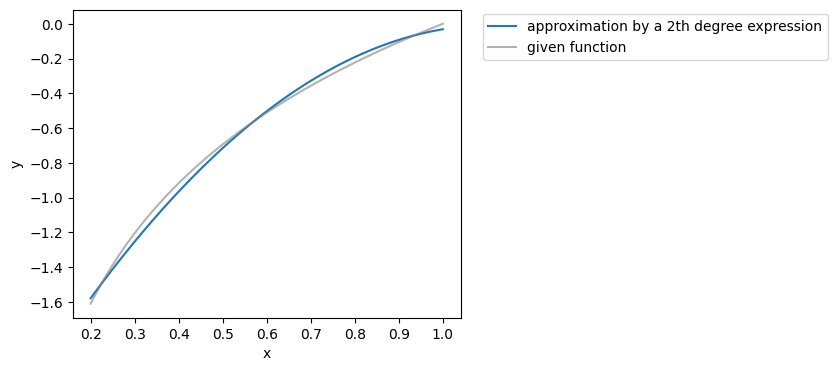

error function graph:


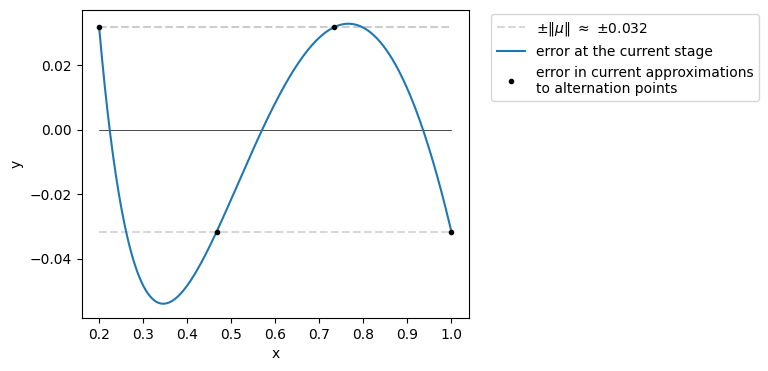


change of alternation points


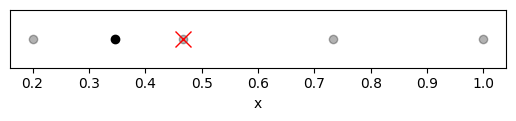

alternation points:
0.2 0.3456 0.7333 1 
absolute values of errors at alternation points:
0.032 0.054 0.032 0.032 

--------  ITERATION 2  --------

the parameter value approaches the expression at the current approximation stage:
	a: -2.3452517496655525 4.27574244228995 -1.9709859075489755 

approximate expression at the current approximation stage:
	P = -2.3453 + 4.2757x - 1.971x^2

absolute value of the approximation error at the alternation points:  |mu| = 0.0405
absolute value of the largest approximation error:  ro = 0.0406 

graph of the given and approximate functions:


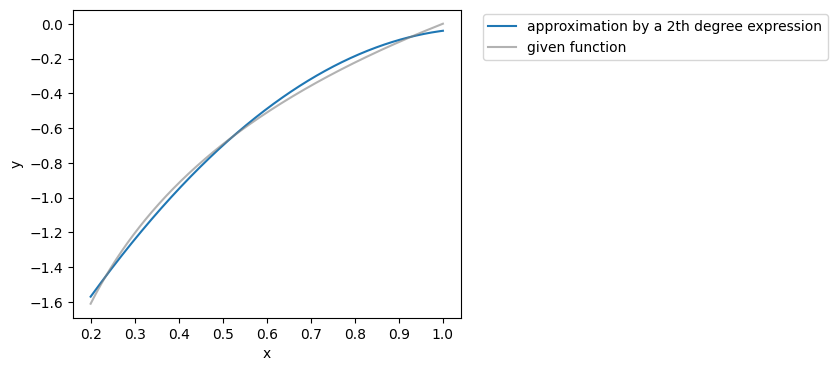

error function graph:


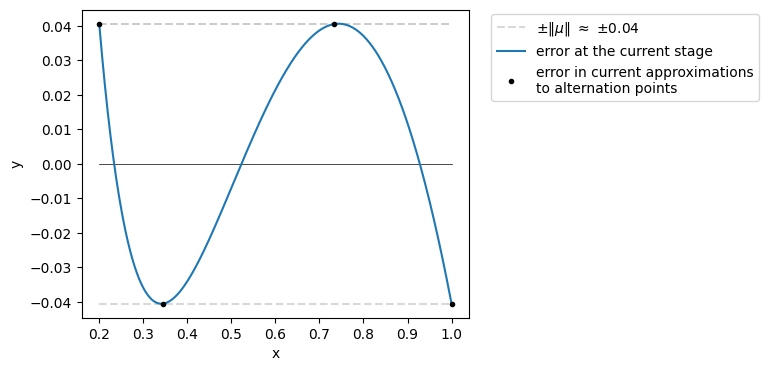


As a result of the approximation, the expression obtained is:  P = -2.3453 + 4.2757x - 1.971x^2
number of iterations: 2 

coordinates of the alternation points:  0.2 0.35 0.73 1 
absolute values of errors at alternation points:
	0.0405 0.0405 0.0405 0.0405 

In [4]:
number_of_points = 500
xx = np.linspace(x_0,x_n,number_of_points)
j = 0

# 1 creating alternation points
z_delta = (x_n - x_0)/(m+1)
z = [(x_0 + i*z_delta) for i in range(m+2)]

eps_for_secant_method = ''
if expression_type == 1:
    # v_0, v_1 = 3,5 # 0.01,0.3
    v_0, v_1 = 5.5, 6.5                  # can change
    eps_for_secant_method = 10**(-15)

while j<30:
    if iter_vis == 0: print('--------  ITERATION', j+1, ' --------')
    
    # 2 search for approximate values of the minimax approximation parameters and the error value mu at a given step
    v,A, a,mu = parameters(eps_for_secant_method,iter_vis)
    
    # 3 сalculation of maximum error
    ro,x_ro = ro_j(expression_type)
    if iter_vis == 0:
        #print('absolute value of the largest approximation error:  ro =',d_round(ro,4),'\n')
        n_to_round = 3; ro_round = d_round(ro,n_to_round)
        while ro_round == 0:
            n_to_round += 2
            ro_round = d_round(ro,n_to_round)
        
        print('absolute value of the largest approximation error:  ro =',ro_round,'\n')

        visualization_functions()
        visualization_error()
    
    # 4 checking the condition for termination of the function approximation
    if mu!= 0: statement = ((abs(ro-abs(mu)))/abs(mu) <= eps)
    else: statement = 0
    # 5 replacing alternance points
    if not statement:
        z = replacing_alternance_points(z, iter_vis)
        j += 1
    else: break

if iter_vis == 1:
    visualization_functions()
    visualization_error()

final_output(a, v,A)